#### The poker data is descriptive format in txt files, so the first step to extract the information with the regex module. I will first concatinate all the files into a single string, then extract information from that string.

In [1]:
# import modules
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# create a list of files to be opened in the current directory
files_ls = [i for i in os.listdir('.') if i.endswith('.txt')]
# inspect the number of files to be opened and an examplary file name
files_ls[0], len(files_ls)

('abs NLH handhq_1-OBFUSCATED.txt', 325)

In [3]:
# initiate a list to store all the files
opened_files = []
# open all 325 files
for i in files_ls:
    with open(i, 'r') as file:
        # read each file as a string and then append it to the opened_files list
        opened_files.append(file.read())
# inspect the number of items in the opened_files list and the number of characters in the first items on that list
len(opened_files), len(opened_files[0])

(325, 1516071)

In [4]:
# each of the files contain 1000 hands of poker
# concatnate the entire list into a single string
ls_str = ''
for i in opened_files:
    ls_str += i
# inspect the number of characters in the str
len(ls_str)

471306488

In [5]:
# each hand of poker is seperated by 3 empty lines
# split the str of over 470 million characters into poker hands, drop final entry because it's an empty string
poker_hands = np.array(ls_str.split('\n\n\n\n')[:-1])
# inspect the number of poker hands recorded (expecting 324000+), and an example of a hand
len(poker_hands), poker_hands[-1]

(324011,
 'Stage #3035396830: Holdem  No Limit $1 - 2009-07-06 10:22:40 (ET)\nTable: ALABAMA ST (Real Money) Seat #5 is the dealer\nSeat 5 - wMdq1Vsfb3yU3bONnHEvmg ($221.53 in chips)\nSeat 6 - 0xx2I+FfRzMVj7w16FMilQ ($102.50 in chips)\nSeat 1 - OPEglAGmUA0vHFHWj5Q2yQ ($23.80 in chips)\nSeat 2 - YSHxGU0SJJArHMcfAioprg ($129.25 in chips)\nSeat 3 - EL56pDqJIH50UlBT0W57lw ($212.40 in chips)\nSeat 4 - WtuwXxyxbK9O35PGqYc8Zg ($169.45 in chips)\n0xx2I+FfRzMVj7w16FMilQ - Posts small blind $0.50\nOPEglAGmUA0vHFHWj5Q2yQ - Posts big blind $1\n*** POCKET CARDS ***\nYSHxGU0SJJArHMcfAioprg - Folds\nEL56pDqJIH50UlBT0W57lw - Folds\nWtuwXxyxbK9O35PGqYc8Zg - Raises $3.50 to $3.50\nwMdq1Vsfb3yU3bONnHEvmg - Folds\n0xx2I+FfRzMVj7w16FMilQ - Folds\nOPEglAGmUA0vHFHWj5Q2yQ - Folds\nWtuwXxyxbK9O35PGqYc8Zg - returned ($2.50) : not called\n*** SHOW DOWN ***\nWtuwXxyxbK9O35PGqYc8Zg - Does not show\nWtuwXxyxbK9O35PGqYc8Zg Collects $2.50 from main pot\n*** SUMMARY ***\nTotal Pot($2.50)\nSeat 1: OPEglAGmUA0vHFHWj5Q2y

#### After observing the splitted strings, I can see there are more than 320k recorded poker hands. Next steps will be my attempt to clean and extract information from these records.

drop all hands that have pot size of 0 (this happens when there is no small blind and everyone folds to the big blind)

In [6]:
# extract pot sizes from the list of hands
pot_sizes = np.array([float(re.findall(r'(?<=Pot\(\$)\d*\.*\d*?(?=\D)', i)[0]) for i in poker_hands])
len(pot_sizes)

324011

In [7]:
# get index of all 0 pot sizes
no_pot = [i for i, e in enumerate(pot_sizes) if e == 0]
len(no_pot)

546

In [8]:
# delete the list of indexes from poker_hands and pot_sizes
poker_hands1 = np.delete(poker_hands, no_pot)
pot_sizes1 = np.delete(pot_sizes, no_pot)
len(poker_hands1), len(pot_sizes1)

(323465, 323465)

In [9]:
# define several lists of potentially useful information to extract from the original text
hand_ids = []
table_names = []
active_seats = []
num_players = []
active_players = []
dealer_positions = []
winners = []

In the next several cells, extract values from poker_hands and record them into pre-defined variables
These could have been done in a single cell by a single for loop.
I splited in to different cells in case a mistake was made so I don't have to reiterate everything over 300k items.

In [10]:
# extrat unique id number of each hand
hand_ids = []
for i in poker_hands1:
    # extract hand id values
    hand_id = re.findall(r'(?<=#)\d+(?=:)', i)
    if hand_id != []:
        hand_ids.append(hand_id[0])
    else:
        hand_ids.append('NA')
len(hand_ids)

323465

In [11]:
# extract table names for each hand
table_names = []
for i in poker_hands1:
    table_name = re.findall(r'(?<=Table: ).*(?= \(Real)', i)[0]
    table_names.append(table_name)
# check the number of UNIQUE table names
len(table_names), len(set(table_names))  

(323465, 691)

In [12]:
# extract active seats
active_seats = []
for i in poker_hands1:
    active_seat = re.findall(r'(?<=Seat )\d(?= -)', i)
    active_seats.append(active_seat)
len(active_seats)

323465

In [13]:
# From active_seats, I can derive the number of active players at the table
num_players = [len(i) for i in active_seats]
len(num_players), num_players[:5]

(323465, [4, 5, 9, 7, 6])

In [14]:
# extract corresponding players in each seat, note that each player name is encoded into a series of 22 characters
active_players = []
for i in poker_hands1:
    active_player = re.findall(r'(?<=Seat \d - ).*(?= \(\$)', i)
    active_players.append(active_player)
len(active_players), active_players[0]

(323465,
 ['vETYfpoA+FhBercnDPJrRw',
  'DeZAZcPNNQ5w+Wb+5ujZdA',
  'AiiJXMM0CfYl69+Nq3jyfA',
  'id+sbECX+YdI8qhMhpje+g'])

In [15]:
# extract dealer seat (last to act) positions, in theory, this seat should win the most amount of chips
dealer_positions = []
for i in poker_hands1:
    dealer_position = re.findall(r'\d(?= is the)', i)[0]
    dealer_positions.append(dealer_position)
len(dealer_positions), dealer_positions[:5]
   

(323465, ['5', '4', '2', '1', '6'])

In [16]:
# winner of the pot, take first 22 characters of each string to represent player, characters after that is the position
winners = []
for i in poker_hands1:
    winner = re.findall(r'(?<=Seat \d\: ).*(?= \w{3,} Total)',i)
    if winner != []:                    
        winners.append(winner[0])
    else:
        winners.append('NA')
len(winners), winners[:3]

(323465,
 ['DeZAZcPNNQ5w+Wb+5ujZdA (small blind)',
  'uwsIGbIB4ktlhz44JKQKDQ (small blind)',
  'LHSEggf8hUg0kqvaCgiJcw'])

inspect and fix the 'NA' values in winners

In [17]:
winner_NA = []
for i, e in enumerate(winners):
    if e == 'NA':
        winner_NA.append(i)
len(winner_NA), winner_NA[:5]

(93, [6747, 19007, 22422, 24475, 43840])

In [18]:
poker_hands1[winner_NA[:3]]

array(['Stage #3036521936: Holdem  No Limit $1 - 2009-07-06 17:41:51 (ET)\nTable: KALAMAZOO (Real Money) Seat #5 is the dead dealer\nSeat 6 - 9GqxeZdEybKVcREg88iLsg ($34.30 in chips)\nSeat 1 - Tc69lc8lChNrgXnKvsPOwA ($196.45 in chips)\nSeat 3 - emkZhOhUot7/gO+xLvPkQw ($231.30 in chips)\n9GqxeZdEybKVcREg88iLsg - Posts small blind $0.50\nemkZhOhUot7/gO+xLvPkQw - Posts big blind $1\np7tW8a9G4XZ9afzYEnSCRQ - Posts $1\n*** POCKET CARDS ***\np7tW8a9G4XZ9afzYEnSCRQ - Checks\n9GqxeZdEybKVcREg88iLsg - Calls $0.50\nemkZhOhUot7/gO+xLvPkQw - Checks\n*** FLOP *** [7s Ah Kc]\n9GqxeZdEybKVcREg88iLsg - Checks\nemkZhOhUot7/gO+xLvPkQw - Folds\np7tW8a9G4XZ9afzYEnSCRQ - Bets $3\n9GqxeZdEybKVcREg88iLsg - Folds\np7tW8a9G4XZ9afzYEnSCRQ - returned ($3) : not called\n*** SHOW DOWN ***\n- Does not show\np7tW8a9G4XZ9afzYEnSCRQ Collects $2.85 from main pot\n*** SUMMARY ***\nTotal Pot($3) | Rake ($0.15)\nBoard [7s Ah Kc]\nSeat 3: emkZhOhUot7/gO+xLvPkQw (big blind) Folded on the FLOP\nSeat 6: 9GqxeZdEybKVcREg88iLsg

Looks like the NAs in poker_hands are due to entry error in original data recording
Leave them as NAs for now because there are only 93 NAs, and can easily be fixed in dataframe later


there are a few things I need to do for the winners list
* seperate the id and positions into 2 lists
* only big blind, small blind, and dealer are labeled positions, assign 'other' to rest

In [19]:
# create a list of winner's id from the first 22 characters of each item in the winner's list
winner_ids = []
for i in winners:
    winner_ids.append(i[:22])
len(winner_ids), winner_ids[:5]

(323465,
 ['DeZAZcPNNQ5w+Wb+5ujZdA',
  'uwsIGbIB4ktlhz44JKQKDQ',
  'LHSEggf8hUg0kqvaCgiJcw',
  'kukN3pTqN1CyHqx/bq+8xw',
  'AiiJXMM0CfYl69+Nq3jyfA'])

In [20]:
# create a list of winner's position, they should be the characters after the 22nd, label non entries as 'other'
winner_pos = []
for i in winners:
    if len(i) > 22:
        winner_pos.append(i[23:])
    else:
        winner_pos.append('other')
set(winner_pos)

{'(big blind)',
 '(dealer)',
 '(dealer) (small blind)',
 '(small blind)',
 'Vm0x20fGK8i7pJSMjxNCg blind)',
 'Vm0x20fGK8i7pJSMjxNCgll blind)',
 'all blind)',
 'd)',
 'ind)',
 'lizdsKSUTdz03DGhameVwbig blind)',
 'lizdsKSUTdz03DGhameVwdealer)',
 'lizdsKSUTdz03DGhameVwsmall blind)',
 'other'}

Upon inspection of the unique values of winner_pos, few changes can be made
winner positions with dealer and small blind is simply dealer in a headsup pot
all values not in [big blind, small blind, dealer, other] are entry errors, assign them as other

In [21]:
winner_pos1 = []
for i in winner_pos:
    if i == '(big blind)':
        winner_pos1.append('big blind')
    elif i == '(dealer)' or i == '(dealer) (small blind)':
        winner_pos1.append('dealer')
    elif i == '(small blind)':
        winner_pos1.append('small blind')
    else:
        winner_pos1.append('other')
len(winner_pos1), set(winner_pos1)

(323465, {'big blind', 'dealer', 'other', 'small blind'})

In [22]:
# start setting up a dataframe with the lists so far
col = ['hand_id', 'table_name', 'dealer_pos', 'pot_size', 'winner_player_id', 'winner_position']
table_setup = pd.DataFrame([hand_ids, table_names, dealer_positions, pot_sizes1, winner_ids, winner_pos1]).T
table_setup.columns = col
table_setup.sort_values('table_name')

,hand_id,table_name,dealer_pos,pot_size,winner_player_id,winner_position
97558,3056371366,ABBEY AVE,4,7.5,+IoUkQT+zPz8j3q9Q0NsqQ,big blind
93463,3055738160,ABBEY AVE,3,5.5,qZakGxs+qq53zX908Ec0YQ,other
93485,3055740986,ABBEY AVE,4,26.5,kczVAxMl9IVQn3atcEEDFw,big blind
93523,3055745278,ABBEY AVE,5,10,1fPsyUc/dhU5ddGG8evWaQ,other
93543,3055747620,ABBEY AVE,6,17,+JXQvDQQyTSprPfu5NY+zg,other
...,...,...,...,...,...,...
131264,3063332436,ZERMATT AVE,5,10.5,ROLP6S9kaoxp9w2XBSEfig,other
131252,3063330352,ZERMATT AVE,3,2.5,ROLP6S9kaoxp9w2XBSEfig,dealer
131242,3063329304,ZERMATT AVE,2,2,ROLP6S9kaoxp9w2XBSEfig,small blind
131223,3063324972,ZERMATT AVE,9,8.5,840nfpjonl8fBJ6zZoS7Bg,big blind


#### In the next few cells, I will use the dataframe created above for some basic visualization, and see if they make sense

Text(0.5, 1.0, 'which position wins more pots')

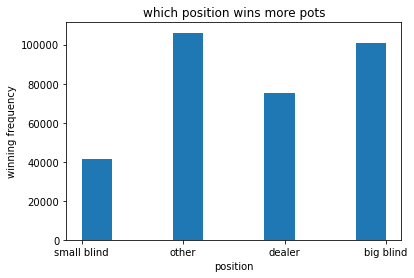

In [23]:
plt.hist(table_setup.winner_position)
plt.xlabel('position')
plt.ylabel('winning frequency')
plt.title('which position wins more pots')

Seems like big blind is winning more pots than dealer.
This is misleading because the number of pots won by the blinds are inflated, cause they are involved in more pots.
Select hands with pot_size greater than $1.50, thus getting rid of most hands that ends pre-flop

Text(0.5, 1.0, 'number of pots won by position (pot sizes greater than blinds sizes)')

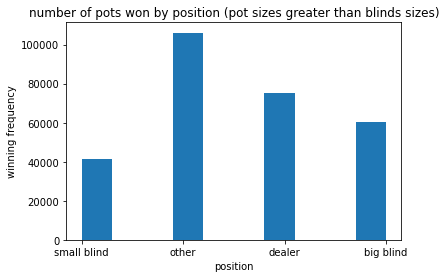

In [24]:
plt.hist(table_setup.winner_position[table_setup.pot_size > 1.5])
plt.xlabel('position')
plt.ylabel('winning frequency')
plt.title('number of pots won by position (pot sizes greater than blinds sizes)')

The plot below confirms that a lot of pots won by the big blind are when everybody else folds preflop

Text(0.5, 1.0, 'pot size distribution')

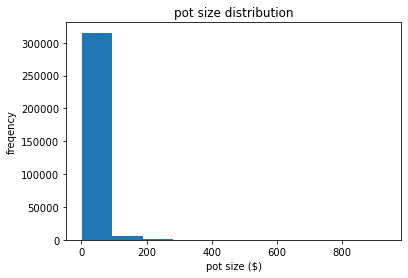

In [25]:
# plot the pot size distribution
plt.hist(table_setup.pot_size)
plt.xlabel('pot size ($)')
plt.ylabel('freqency')
plt.title('pot size distribution')

The distribution of pot size have some extreme outliers, plot again after getting rid of them

In [26]:
from scipy import stats
pot_size_z = np.abs(stats.zscore(list(table_setup.pot_size)))
pot_size_z

array([0.40155919, 0.3689393 , 0.08773917, ..., 0.41786913, 0.40155919,
       0.38524924])

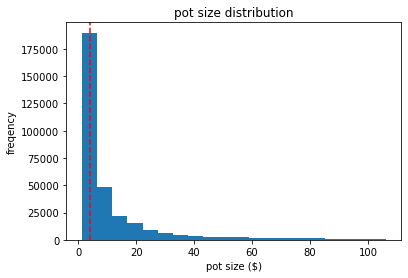

In [27]:
# getting rid of values with z score of 3 or higher
table_setup['pot_size_z'] = pot_size_z
plt.hist(table_setup.pot_size[table_setup.pot_size_z <= 3], bins=20)
plt.xlabel('pot size ($)')
plt.ylabel('freqency')
plt.title('pot size distribution')
plt.axvline(table_setup.pot_size.median(), ls = '--', c='red')

Most pots are below $10, with a median of around $5. This make sense because players don't make good hands often in poker, so many tend to fold after they don't have anything on the flop. This is especially true at lower stakes because players tends to want to see the flop more often, and don't bluff as often as they should when they don't make hands. Resulting in overall smaller pots.

#### Next steps are to extract more detailed information on how each hand is played out. The goal is to create a dataframe that describes every players' actions on every street in each hand. The resulting dataframe should have 1.5-2 million rows.

extract the sections in each hand that describe the actions in the hands.

In [28]:
hand_details = []
for i in poker_hands1:
    hand_detail = re.findall(r'(?<=CARDS \*{3}\n).*(?=\n\*{3} SUMMARY)', i, re.DOTALL)[0]
    hand_details.append(hand_detail)
len(hand_details), hand_details[0]

(323465,
 'vETYfpoA+FhBercnDPJrRw - Folds\nDeZAZcPNNQ5w+Wb+5ujZdA - Raises $2.50 to $3\nid+sbECX+YdI8qhMhpje+g - Folds\nDeZAZcPNNQ5w+Wb+5ujZdA - returned ($2) : not called\n*** SHOW DOWN ***\nDeZAZcPNNQ5w+Wb+5ujZdA - Does not show\nDeZAZcPNNQ5w+Wb+5ujZdA Collects $2 from main pot')

Further divide hand details into pre_flop, flop, turn, river

In [29]:
pre_flop = []
for i in hand_details:
    pre = re.findall(r'.*?(?=\n\*{3})', i, re.DOTALL)[0]
    pre_flop.append(pre)
len(pre_flop), pre_flop[:2]

(323465,
 ['vETYfpoA+FhBercnDPJrRw - Folds\nDeZAZcPNNQ5w+Wb+5ujZdA - Raises $2.50 to $3\nid+sbECX+YdI8qhMhpje+g - Folds\nDeZAZcPNNQ5w+Wb+5ujZdA - returned ($2) : not called',
  '9tEZRm6oI+e1Tz0x72b0vQ - Checks\nAiiJXMM0CfYl69+Nq3jyfA - Folds\ns32h30cC3rPhG5FiSCU42g - Folds\nuwsIGbIB4ktlhz44JKQKDQ - Calls $0.50\nahN79dgDL8C99nHik5Up7Q - Checks'])

In [30]:
flop = []
for i in hand_details:
    fl = re.findall(r'(?<=FLOP \*{3} ).*?(?=\n\*{3})', i, re.DOTALL)
    if fl == []:
        flop.append('NA')
    else:
        flop.append(fl[0])
len(flop), flop[:2]

(323465,
 ['NA',
  '[9s 7h 2c]\nuwsIGbIB4ktlhz44JKQKDQ - Checks\nahN79dgDL8C99nHik5Up7Q - Checks\n9tEZRm6oI+e1Tz0x72b0vQ - Checks'])

In [31]:
turn = []
for i in hand_details:
    tu = re.findall(r'(?<=TURN \*{3} ).*?(?=\n\*{3})', i, re.DOTALL)
    if tu == []:
        turn.append('NA')
    else:
        turn.append(tu[0])
len(turn), turn[:2]

(323465,
 ['NA',
  '[9s 7h 2c] [9d]\nuwsIGbIB4ktlhz44JKQKDQ - Checks\nahN79dgDL8C99nHik5Up7Q - Checks\n9tEZRm6oI+e1Tz0x72b0vQ - Checks'])

In [32]:
river = []
for i in hand_details:
    riv = re.findall(r'(?<=RIVER \*{3} ).*?(?=\n\*{3})', i, re.DOTALL)
    if riv == []:
        river.append('NA')
    else:
        river.append(riv[0])
len(river), river[:2]

(323465,
 ['NA',
  '[9s 7h 2c 9d] [9c]\nuwsIGbIB4ktlhz44JKQKDQ - Checks\nahN79dgDL8C99nHik5Up7Q - Checks\n9tEZRm6oI+e1Tz0x72b0vQ - Checks'])

From pre, flop, turn, river info, I can derive which street each hand ended on, and add to table_setup dataframe

In [33]:
hand_ended = []
for i in range(len(flop)):
    if flop[i] == 'NA':
        hand_ended.append('preflop')
    elif turn[i] == 'NA':
        hand_ended.append('flop')
    elif river[i] == 'NA':
        hand_ended.append('turn')
    else:
        hand_ended.append('river')
len(hand_ended), hand_ended[:5]

(323465, ['preflop', 'river', 'flop', 'river', 'preflop'])

In [34]:
table_setup['hand_ended_on'] = hand_ended
table_setup.head()

,hand_id,table_name,dealer_pos,pot_size,winner_player_id,winner_position,pot_size_z,hand_ended_on
0,3017237436,INDIANA ST,5,2,DeZAZcPNNQ5w+Wb+5ujZdA,small blind,0.401559,preflop
1,3017235188,ALABAMA ST,4,3,uwsIGbIB4ktlhz44JKQKDQ,small blind,0.368939,river
2,3017243048,CORTEZ AVE,2,17,LHSEggf8hUg0kqvaCgiJcw,other,0.087739,flop
3,3017249292,GEORGIA HWY,1,23.5,kukN3pTqN1CyHqx/bq+8xw,dealer,0.299768,river
4,3017240160,BREWERY ST,6,2.5,AiiJXMM0CfYl69+Nq3jyfA,other,0.385249,preflop


In [35]:
# the 2-d lists created earlier active_seats and active_players can be used to initiate new dataframe on hand details
hand_details_df = pd.DataFrame([hand_ids, active_seats, active_players]).T
hand_details_df.columns = ['hand_id', 'seat', 'player id']
hand_details_df.head()

,hand_id,seat,player id
0,3017237436,"[5, 6, 2, 3]","[vETYfpoA+FhBercnDPJrRw, DeZAZcPNNQ5w+Wb+5ujZd..."
1,3017235188,"[4, 5, 1, 2, 3]","[s32h30cC3rPhG5FiSCU42g, uwsIGbIB4ktlhz44JKQKD..."
2,3017243048,"[2, 3, 4, 5, 6, 7, 8, 9, 1]","[kExuS3SxZYRG/oFTl97LzA, ZpYc8/ksQYSNFEFIeiSSW..."
3,3017249292,"[1, 2, 3, 4, 7, 8, 9]","[kukN3pTqN1CyHqx/bq+8xw, kExuS3SxZYRG/oFTl97Lz..."
4,3017240160,"[6, 1, 2, 3, 4, 5]","[TiIZzdoB4G68QIRlf2vUrQ, c6u64hpBVK0VIc6NUysIq..."


In [36]:
hand_details_df.shape

(323465, 3)

In [37]:
starting_stacks = []
for i in poker_hands1:
    starting_stack = re.findall(r'(?<=\(\$).*(?= in chips)', i)
    starting_stacks.append(starting_stack)
hand_details_df['starting_stack'] = starting_stacks
len(starting_stacks), starting_stacks[:2]

(323465,
 [['197', '200.30', '78.50', '81.60'],
  ['55.50', '247.10', '14.60', '200', '96.50']])

Players need to post big blind, small blind, and sometimes ante and missed blinds. Extract information on who posted how much for each hand

In [38]:
posts = []
for n, i in enumerate(poker_hands1):
    # define x as active players of that hand, and y as a tuple of player id and amount posted
    x = active_players[n]
    y = re.findall(r'(.{22}) \- Posts(?:\sbig\sblind\s|\ssmall\sblind\s|\sAnte\s|\s)\$(.*)', i)
    # create list for each hand where posted amounts matches the player id
    match = []
    # iterate over each player in x
    for a in x:
        # count how much each player posted
        total = 0
        # look through every item in y for amounts posted by each player
        for b in y:
            if a == b[0]:
                total += float(b[1])
        match.append(total)
    posts.append(match)
len(posts)

323465

In [39]:
hand_details_df['post'] = posts
hand_details_df.shape

(323465, 5)

In the following cells, I will extract information for preflop, flop, turn, and river actions. 

In [40]:
pre_action = []
for n, i in enumerate(pre_flop):
    x = active_players[n]
    y = re.findall(r'(.{22}) \- (Raises|Checks|Folds|Calls|Bets)', i)
    actions = []
    for a in x:
        action = ''
        for b in y:
            if a == b[0]:
                action += (b[1] + ' ')
        if action == '':
            action = 'NA'
        actions.append(action.strip())
    pre_action.append(actions)
len(pre_action)

323465

In [41]:
pre_amount = []    
for n, i in enumerate(pre_flop):
    x = active_players[n]
    y = re.findall(r'(.{22}) \- (?:Raises|Checks|Calls|Bets) \$(\S+)', i)
    amounts = []
    for a in x:
        amount = 0
        for b in y:
            if a == b[0]:
                amount += float(b[1])
        amounts.append(amount)
    pre_amount.append(amounts)
len(pre_amount)

323465

In [42]:
flop_action = []
flop_amount = []
for n, i in enumerate(flop):
    x = active_players[n]
    y = re.findall(r'(.{22}) \- (Raises|Checks|Folds|Calls|Bets)', i)
    actions = []
    for a in x:
        action = ''
        for b in y:
            if a == b[0]:
                action += (b[1] + ' ')
        if action == '':
            action = 'NA'
        actions.append(action.strip())
    flop_action.append(actions)
for n, i in enumerate(flop):
    x = active_players[n]
    y = re.findall(r'(.{22}) \- (?:Raises|Checks|Calls|Bets) \$(\S+)', i)
    amounts = []
    for a in x:
        amount = 0
        for b in y:
            if a == b[0]:
                amount += float(b[1])
        amounts.append(amount)
    flop_amount.append(amounts)
len(flop_action), len(flop_amount)

(323465, 323465)

In [43]:
turn_action = []
turn_amount = []
for n, i in enumerate(turn):
    x = active_players[n]
    y = re.findall(r'(.{22}) \- (Raises|Checks|Folds|Calls|Bets)', i)
    actions = []
    for a in x:
        action = ''
        for b in y:
            if a == b[0]:
                action += (b[1] + ' ')
        if action == '':
            action = 'NA'
        actions.append(action.strip())
    turn_action.append(actions)
for n, i in enumerate(turn):
    x = active_players[n]
    y = re.findall(r'(.{22}) \- (?:Raises|Checks|Calls|Bets) \$(\S+)', i)
    amounts = []
    for a in x:
        amount = 0
        for b in y:
            if a == b[0]:
                amount += float(b[1])
        amounts.append(amount)
    turn_amount.append(amounts)
len(turn_action), len(turn_amount)

(323465, 323465)

In [44]:
river_action = []
river_amount = []
for n, i in enumerate(river):
    x = active_players[n]
    y = re.findall(r'(.{22}) \- (Raises|Checks|Folds|Calls|Bets)', i)
    actions = []
    for a in x:
        action = ''
        for b in y:
            if a == b[0]:
                action += (b[1] + ' ')
        if action == '':
            action = 'NA'
        actions.append(action.strip())
    river_action.append(actions)
for n, i in enumerate(river):
    x = active_players[n]
    y = re.findall(r'(.{22}) \- (?:Raises|Checks|Calls|Bets) \$(\S+)', i)
    amounts = []
    for a in x:
        amount = 0
        for b in y:
            if a == b[0]:
                amount += float(b[1])
        amounts.append(amount)
    river_amount.append(amounts)
len(river_action), len(river_amount)

(323465, 323465)

In [45]:
# find out which player is the dealer (last to act) in each hand
table_setup['dealer_pos'][0]

'5'

In [46]:
dealer_player = []
for n, i in enumerate(poker_hands1):
    x = re.findall(r'Seat (\d) \- (.{22})', i)
    dealer = ''
    for a in x:
        if a[0] == table_setup['dealer_pos'][n]:
            dealer += a[1]
    dealer_player.append(dealer)   
len(dealer_player)

323465

In [47]:
table_setup['dealer_player_id'] = dealer_player

In [48]:
# construct a column for lists of positions of each player
position = []
for n, i in enumerate(poker_hands1):
    x = active_players[n]
    y = re.findall(r'(.{22}) \- Posts (small blind|big blind) \$', i)
    pos = []
    for a in x:
        p = ''
        for b in y:
            if a == b[0]:
                p += b[1]
        if a == dealer_player[n]:
            p = 'dealer'
        if p == '':
            p = 'other'
        pos.append(p)
    position.append(pos)
len(position)

323465

In [49]:
hand_details_df['position'] = position
hand_details_df['preflop'] = pre_action
hand_details_df['p_amount'] = pre_amount
hand_details_df['flop'] = flop_action
hand_details_df['f_amount'] = flop_amount
hand_details_df['turn'] = turn_action
hand_details_df['t_amount'] = turn_amount
hand_details_df['river'] = river_action
hand_details_df['r_amount'] = river_amount
hand_details_df.shape

(323465, 14)

In [50]:
table_setup.shape

(323465, 9)

In [51]:
hand_details_df['winner_player_id'] = winner_ids

In [52]:
hand_details_df = hand_details_df[hand_details_df['winner_player_id'] != 'NA']
hand_details_df.shape

(323372, 15)

In [53]:
table_setup = table_setup[table_setup['winner_player_id'] != 'NA']
table_setup.shape

(323372, 9)

The hand_details data frame is ready. However, each of its values are in the form of lists. For further analysis, I need to expand each list into individual values. The expanded data frame will have the hand_id column as the identifier for each hand, and the every player will be a row.

In [54]:
# recreate lists in the expanded version for the expanded dataframe
hand_ids_exp = []
active_seats_exp = []
active_players_exp = []
starting_stacks_exp = []
posts_exp = []
pre_action_exp = []
pre_amount_exp = []
flop_action_exp = []
flop_amount_exp = []
turn_action_exp = []
turn_amount_exp = []
river_action_exp = []
river_amount_exp = []
position_exp = []
for i in range(len(hand_ids)):
    active_seats_exp += active_seats[i]
    active_players_exp += active_players[i]
    starting_stacks_exp += starting_stacks[i]
    posts_exp += posts[i]
    pre_action_exp += pre_action[i]
    pre_amount_exp += pre_amount[i]
    flop_action_exp += flop_action[i]
    flop_amount_exp += flop_amount[i]
    turn_action_exp += turn_action[i]
    turn_amount_exp += turn_amount[i]
    river_action_exp += river_action[i]
    river_amount_exp += river_amount[i]
    position_exp += position[i]
    for n in range(len(active_players[i])):
        hand_ids_exp.append(hand_ids[i])

In [55]:
details_exp = pd.DataFrame([hand_ids_exp, active_players_exp, active_seats_exp, starting_stacks_exp, position_exp, posts_exp, pre_action_exp, pre_amount_exp, flop_action_exp, flop_amount_exp, turn_action_exp, turn_amount_exp, river_action_exp, river_amount_exp]).T

In [56]:
details_exp.columns = ['hand_id','player_id','seat','stack','position','post','preflop','p_amount','flop','f_amount','turn','t_amount','river','r_amount']
details_exp.index = details_exp['hand_id']

In [57]:
details_exp.head(), details_exp.tail()

(               hand_id               player_id seat   stack     position post  \
 hand_id                                                                         
 3017237436  3017237436  vETYfpoA+FhBercnDPJrRw    5     197       dealer    0   
 3017237436  3017237436  DeZAZcPNNQ5w+Wb+5ujZdA    6  200.30  small blind  0.5   
 3017237436  3017237436  AiiJXMM0CfYl69+Nq3jyfA    2   78.50        other    0   
 3017237436  3017237436  id+sbECX+YdI8qhMhpje+g    3   81.60    big blind    1   
 3017235188  3017235188  s32h30cC3rPhG5FiSCU42g    4   55.50       dealer    0   
 
            preflop p_amount flop f_amount turn t_amount river r_amount  
 hand_id                                                                 
 3017237436   Folds        0   NA        0   NA        0    NA        0  
 3017237436  Raises      2.5   NA        0   NA        0    NA        0  
 3017237436      NA        0   NA        0   NA        0    NA        0  
 3017237436   Folds        0   NA        0   NA       

In [58]:
# a lot of missing values on the tail, look for instances where list of seat is longer than others


In [59]:
# inspect a couple of these indexs in the original text
print(poker_hands1[239681], poker_hands1[106837])

Stage #3085290304: Holdem  No Limit $1 - 2009-07-20 03:53:29 (ET)
Table: DUBEN AVE (Real Money) Seat #4 is the dealer
Seat 4 - +42liRrZL1beMOq6BzLIVA ($22.43 in chips)
Seat 5 - AgHNNhfzwoC0WQ7M8XQNZQ ($254.45 in chips)
Seat 6 - pX/V1GfkFSGl6Uxof13dmgelizdsKSUTdz03DGhameVw$201.95 in chips)
Seat 1 - 1It0GAQ0kSqlVzyWsWDHIQ ($200 in chips)
Seat 2 - Lw9QOaf4OnS/SkfEjT4Owg ($215.30 in chips)
Seat 3 - yK25VBM6j4HBQtdWdxQZrg ($162.75 in chips)
AgHNNhfzwoC0WQ7M8XQNZQ - Posts small blind $0.50
pX/V1GfkFSGl6Uxof13dmgelizdsKSUTdz03DGhameVw Posts big blind $1
*** POCKET CARDS ***
1It0GAQ0kSqlVzyWsWDHIQ - Folds
Lw9QOaf4OnS/SkfEjT4Owg - Folds
yK25VBM6j4HBQtdWdxQZrg - Calls $1
+42liRrZL1beMOq6BzLIVA - Folds
AgHNNhfzwoC0WQ7M8XQNZQ - Calls $0.50
pX/V1GfkFSGl6Uxof13dmgelizdsKSUTdz03DGhameVw Checks
*** FLOP *** [8h Ks 4h]
AgHNNhfzwoC0WQ7M8XQNZQ - Checks
pX/V1GfkFSGl6Uxof13dmgelizdsKSUTdz03DGhameVw Checks
yK25VBM6j4HBQtdWdxQZrg - Checks
*** TURN *** [8h Ks 4h] [4c]
AgHNNhfzwoC0WQ7M8XQNZQ - Checks
pX/V1GfkF

In [60]:
# create a list of hands to delete
hands_to_delete = []
for i in range(len(hand_ids)):
    if len(active_seats[i]) != len(active_players[i]):
        hands_to_delete.append(hand_ids[i])
len(hands_to_delete)

858

In [61]:
# assign a new variable for the dataframe after dropping the 858 'bad rows'
x = hand_details_df[~hand_details_df['hand_id'].isin(hands_to_delete)].reset_index(drop=True)
x

,hand_id,seat,player id,starting_stack,post,position,preflop,p_amount,flop,f_amount,turn,t_amount,river,r_amount,winner_player_id
0,3017237436,"[5, 6, 2, 3]","[vETYfpoA+FhBercnDPJrRw, DeZAZcPNNQ5w+Wb+5ujZd...","[197, 200.30, 78.50, 81.60]","[0, 0.5, 0, 1.0]","[dealer, small blind, other, big blind]","[Folds, Raises, NA, Folds]","[0, 2.5, 0, 0]","[NA, NA, NA, NA]","[0, 0, 0, 0]","[NA, NA, NA, NA]","[0, 0, 0, 0]","[NA, NA, NA, NA]","[0, 0, 0, 0]",DeZAZcPNNQ5w+Wb+5ujZdA
1,3017235188,"[4, 5, 1, 2, 3]","[s32h30cC3rPhG5FiSCU42g, uwsIGbIB4ktlhz44JKQKD...","[55.50, 247.10, 14.60, 200, 96.50]","[0, 0.5, 1.0, 1.0, 0]","[dealer, small blind, big blind, other, other]","[Folds, Calls, Checks, Checks, Folds]","[0, 0.5, 0, 0, 0]","[NA, Checks, Checks, Checks, NA]","[0, 0, 0, 0, 0]","[NA, Checks, Checks, Checks, NA]","[0, 0, 0, 0, 0]","[NA, Checks, Checks, Checks, NA]","[0, 0, 0, 0, 0]",uwsIGbIB4ktlhz44JKQKDQ
2,3017243048,"[2, 3, 4, 5, 6, 7, 8, 9, 1]","[kExuS3SxZYRG/oFTl97LzA, ZpYc8/ksQYSNFEFIeiSSW...","[94.75, 28.70, 200.90, 69, 36.90, 74.30, 264, ...","[0, 0.5, 1.0, 0, 0, 0, 0, 0, 1.0]","[dealer, small blind, big blind, other, other,...","[Folds, Calls, Checks, Folds, Folds, Calls, Fo...","[0, 0.5, 0, 0, 0, 1.0, 0, 1.0, 0]","[NA, Checks Folds, Checks Folds, NA, NA, Bets ...","[0, 0, 0, 0, 0, 17.0, 0, 6.0, 0]","[NA, NA, NA, NA, NA, NA, NA, NA, NA]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[NA, NA, NA, NA, NA, NA, NA, NA, NA]","[0, 0, 0, 0, 0, 0, 0, 0, 0]",LHSEggf8hUg0kqvaCgiJcw
3,3017249292,"[1, 2, 3, 4, 7, 8, 9]","[kukN3pTqN1CyHqx/bq+8xw, kExuS3SxZYRG/oFTl97Lz...","[66, 543.60, 248.16, 215.80, 128.25, 35.90, 98...","[0, 0.5, 1.0, 0, 0, 0, 0]","[dealer, small blind, big blind, other, other,...","[Raises, Folds, Folds, Folds, Folds, Calls Cal...","[3.0, 0, 0, 0, 0, 3.0, 0]","[Checks, NA, NA, NA, NA, Checks, NA]","[0, 0, 0, 0, 0, 0, 0]","[Bets, NA, NA, NA, NA, Checks Calls, NA]","[3.0, 0, 0, 0, 0, 3.0, 0]","[Bets, NA, NA, NA, NA, Checks Calls, NA]","[5.0, 0, 0, 0, 0, 5.0, 0]",kukN3pTqN1CyHqx/bq+8xw
4,3017240160,"[6, 1, 2, 3, 4, 5]","[TiIZzdoB4G68QIRlf2vUrQ, c6u64hpBVK0VIc6NUysIq...","[138.50, 54.75, 80, 44.10, 87.05, 202.30]","[0, 0.5, 1.0, 0, 0, 0]","[dealer, small blind, big blind, other, other,...","[Folds, Folds, Folds, Folds, Raises, Folds]","[0, 0, 0, 0, 3.5, 0]","[NA, NA, NA, NA, NA, NA]","[0, 0, 0, 0, 0, 0]","[NA, NA, NA, NA, NA, NA]","[0, 0, 0, 0, 0, 0]","[NA, NA, NA, NA, NA, NA]","[0, 0, 0, 0, 0, 0]",AiiJXMM0CfYl69+Nq3jyfA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322576,3035395224,"[4, 6]","[q+7qRox82LHb4d9JJLQk9Q, BIKFfnQvyn9+ELM5Qjumew]","[458.95, 156.05]","[0.5, 1.0]","[dealer, big blind]","[Raises, Calls]","[2.5, 2.0]","[Raises, Bets Folds]","[18.0, 6.0]","[NA, NA]","[0, 0]","[NA, NA]","[0, 0]",q+7qRox82LHb4d9JJLQk9Q
322577,3035395278,"[1, 2, 3, 4, 5, 6]","[0xx2I+FfRzMVj7w16FMilQ, GQ0nywi91EI/9xQjs2PJC...","[113.75, 108.55, 205, 116.75, 118.90, 16.10]","[0, 0.5, 1.0, 0, 0, 0]","[dealer, small blind, big blind, other, other,...","[Raises, Folds, Folds, Folds, Folds, Folds]","[3.0, 0, 0, 0, 0, 0]","[NA, NA, NA, NA, NA, NA]","[0, 0, 0, 0, 0, 0]","[NA, NA, NA, NA, NA, NA]","[0, 0, 0, 0, 0, 0]","[NA, NA, NA, NA, NA, NA]","[0, 0, 0, 0, 0, 0]",0xx2I+FfRzMVj7w16FMilQ
322578,3035395696,"[3, 4, 5, 6, 1, 2]","[EL56pDqJIH50UlBT0W57lw, WbyFTZtHE6doaricbG4eb...","[200, 365.20, 155.32, 57.20, 97.46, 340.65]","[0, 0.5, 1.0, 0, 0, 0]","[dealer, small blind, big blind, other, other,...","[Folds, Folds, NA, Folds, Folds, Folds]","[0, 0, 0, 0, 0, 0]","[NA, NA, NA, NA, NA, NA]","[0, 0, 0, 0, 0, 0]","[NA, NA, NA, NA, NA, NA]","[0, 0, 0, 0, 0, 0]","[NA, NA, NA, NA, NA, NA]","[0, 0, 0, 0, 0, 0]",qoIZizyRrSWFhTV7ehXVnw
322579,3035395738,"[6, 4]","[BIKFfnQvyn9+ELM5Qjumew, q+7qRox82LHb4d9JJLQk9Q]","[147.05, 467.45]","[0.5, 1.0]","[dealer, big blind]","[Raises, Folds]","[1.5, 0]","[NA, NA]","[0, 0]","[NA, NA]","[0, 0]","[NA, NA]","[0, 0]",BIKFfnQvyn9+ELM5Qjumew


In [62]:
# expand each lists for the columns with a similar method as before
# recreate lists in the expanded version for the expanded dataframe
hand_ids_exp = []
active_seats_exp = []
active_players_exp = []
starting_stacks_exp = []
posts_exp = []
pre_action_exp = []
pre_amount_exp = []
flop_action_exp = []
flop_amount_exp = []
turn_action_exp = []
turn_amount_exp = []
river_action_exp = []
river_amount_exp = []
position_exp = []
for i in range(len(x['hand_id'])):
    active_seats_exp += x['seat'][i]
    active_players_exp += x['player id'][i]
    starting_stacks_exp += x['starting_stack'][i]
    posts_exp += x['post'][i]
    pre_action_exp += x['preflop'][i]
    pre_amount_exp += x['p_amount'][i]
    flop_action_exp += x['flop'][i]
    flop_amount_exp += x['f_amount'][i]
    turn_action_exp += x['turn'][i]
    turn_amount_exp += x['t_amount'][i]
    river_action_exp += x['river'][i]
    river_amount_exp += x['r_amount'][i]
    position_exp += x['position'][i]
    for n in range(len(x['player id'][i])):
        hand_ids_exp.append(x['hand_id'][i])

In [63]:
# recreate the expanded dataframe
det_exp_df = pd.DataFrame([hand_ids_exp, active_players_exp, active_seats_exp, starting_stacks_exp, position_exp, posts_exp, pre_action_exp, pre_amount_exp, flop_action_exp, flop_amount_exp, turn_action_exp, turn_amount_exp, river_action_exp, river_amount_exp]).T

In [64]:
#double check head and tail of the dataframe
det_exp_df.columns = ['hand_id','player_id','seat','stack','position','post','preflop','p_amount','flop','f_amount','turn','t_amount','river','r_amount']
det_exp_df.head(), det_exp_df.tail()

(      hand_id               player_id seat   stack     position post preflop  \
 0  3017237436  vETYfpoA+FhBercnDPJrRw    5     197       dealer    0   Folds   
 1  3017237436  DeZAZcPNNQ5w+Wb+5ujZdA    6  200.30  small blind  0.5  Raises   
 2  3017237436  AiiJXMM0CfYl69+Nq3jyfA    2   78.50        other    0      NA   
 3  3017237436  id+sbECX+YdI8qhMhpje+g    3   81.60    big blind    1   Folds   
 4  3017235188  s32h30cC3rPhG5FiSCU42g    4   55.50       dealer    0   Folds   
 
   p_amount flop f_amount turn t_amount river r_amount  
 0        0   NA        0   NA        0    NA        0  
 1      2.5   NA        0   NA        0    NA        0  
 2        0   NA        0   NA        0    NA        0  
 3        0   NA        0   NA        0    NA        0  
 4        0   NA        0   NA        0    NA        0  ,
             hand_id               player_id seat   stack     position post  \
 1764892  3035396830  0xx2I+FfRzMVj7w16FMilQ    6  102.50  small blind  0.5   
 1764893  3

In [65]:
table_setup = table_setup[~table_setup['hand_id'].isin(hands_to_delete)].reset_index(drop=True)

In [66]:
table_setup.shape, x.shape

((322581, 9), (322581, 15))

#### Finally, export the table_setup and details data frames as CSV files, and they will be used for the next steps of analysis.

In [67]:
# double check and export existing dataframes for later use
table_setup.to_csv(r'result_files\general_info.csv')
det_exp_df.to_csv(r'result_files\details_expanded.csv')